In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
vocab_size = 10000
max_length = 100

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [5]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [6]:
early_stopping = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [7]:
def train_model(model_name, model):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(
        x_train, y_train, epochs=5, batch_size=64,
        validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1
    )
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'{model_name} Test Accuracy: {accuracy:.4f}')
    return history

In [8]:
simple_rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
history_rnn = train_model("Simple RNN", simple_rnn_model)
history_lstm = train_model("LSTM", lstm_model)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5824 - loss: 0.6475 - val_accuracy: 0.7850 - val_loss: 0.4806
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8298 - loss: 0.3989 - val_accuracy: 0.8152 - val_loss: 0.4414
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8713 - loss: 0.3139 - val_accuracy: 0.8107 - val_loss: 0.4210
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8370 - loss: 0.3684 - val_accuracy: 0.7644 - val_loss: 0.4889
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8653 - loss: 0.3280 - val_accuracy: 0.8055 - val_loss: 0.4563
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8082 - loss: 0.4253
Simple RNN Test Accuracy: 0.8107
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7250 - loss: 0.5213 - val_accuracy: 0.8353 - val_loss: 0.3697
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8971 - loss: 0.2615 - val_accuracy: 0.8449 - val_loss: 

In [11]:
print("\n================ Accuracy Comparison ================")
print(f"Simple RNN Test Accuracy: {history_rnn.history['accuracy'][-1]:.4f}")
print(f"LSTM Test Accuracy: {history_lstm.history['accuracy'][-1]:.4f}")
print("====================================================")



================ Accuracy Comparison ================
Simple RNN Test Accuracy: 0.8700
LSTM Test Accuracy: 0.9473


In [12]:
def plot_history(history_rnn, history_lstm, metric, title):
    plt.plot(history_rnn.history[metric], label='Simple RNN ' + metric)
    plt.plot(history_lstm.history[metric], label='LSTM ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.title(title)
    plt.legend()
    plt.show()

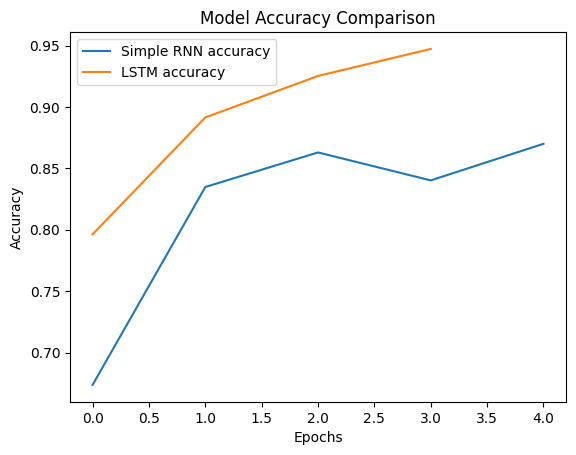

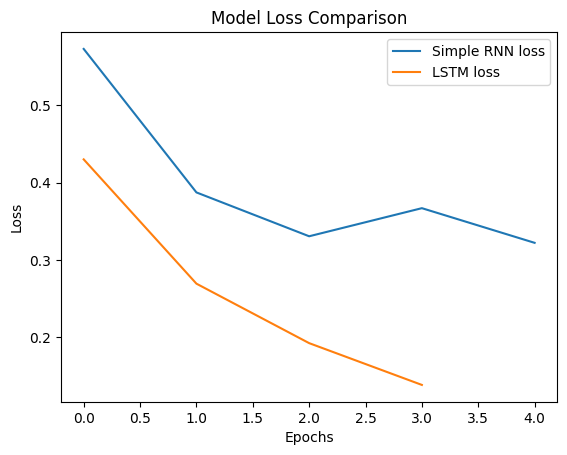

In [13]:
plot_history(history_rnn, history_lstm, 'accuracy', 'Model Accuracy Comparison')
plot_history(history_rnn, history_lstm, 'loss', 'Model Loss Comparison')